Meiosis pairing: MSCD and average linkages per chromosome
-------------------------------------------------------------------------

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn

from pathlib import Path
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)

output_folder = Path('meiosis-figures/')

Show MSCD for 5 sample cells (URA3, chr. V, $b = 0.015 \mu m$)

In [2]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

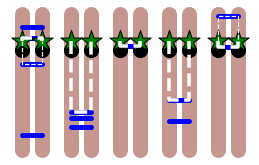

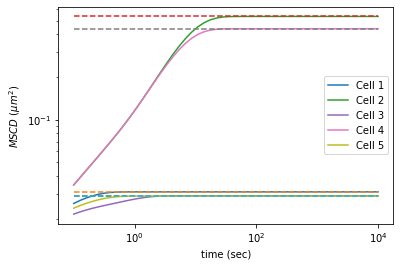

In [3]:
mu = 2
cells = [poly_dyn.generate_example_cell(mu, total_length_um) for i in range(5)]
ax, all_closest_links = poly_dyn.draw_cells(cells)

plt.show()
t = np.logspace(-1,4,50).astype(float)
plt.figure()

for i, linkages in enumerate(cells):
    mscd = poly_dyn.model_mscd(t,linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
    mscd_plateau_cell = poly_dyn.model_plateau(
                linkages, label_loc_um, total_length_um, nuc_radius, kuhn_length)
    plt.loglog(t, mscd, label = 'Cell ' + str(i+1))
    plt.loglog(t, mscd_plateau_cell + 0*t,'--')
    
plt.legend()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

In [4]:
cells = np.array([np.array([ 2.80260366,  8.01409611, 16.15546293]),
       np.array([ 2.44545907, 10.10344069, 11.28044254]), np.array([7.205263]),
       np.array([17.11988376]), np.array([])], dtype=object)

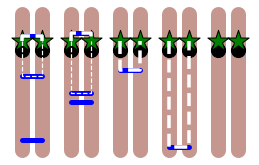

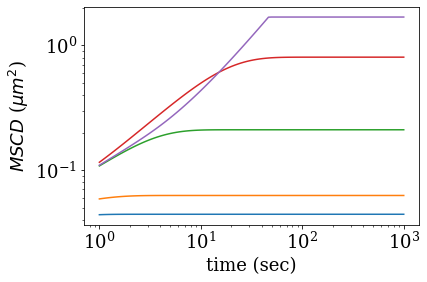

In [5]:
ax, all_closest_links = poly_dyn.draw_cells(cells)

plt.show()
t = np.logspace(0,3,100).astype(float)
plt.figure()

for i, linkages in enumerate(cells):
    mscd = poly_dyn.model_mscd(t,linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
    plt.loglog(t, mscd, label = 'Cell ' + str(i+1))
#plt.legend()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

MSCD versus time for varying $\lambda$ (URA3, chr. V, $b = 0.015 \mu m$)

In [9]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

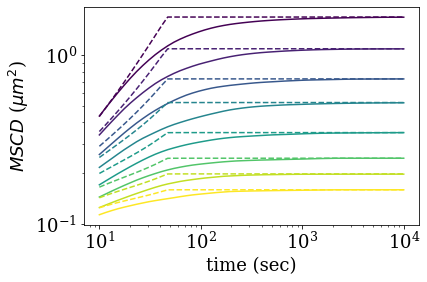

In [10]:
mus = np.linspace(0,4,8)
num_cells=1000
t = np.logspace(1,4,50).astype(float)

for i_mu in range(len(mus)):
    mu = mus[i_mu]
    mscd = np.zeros_like(t).astype(float)
    mscd_exp_d = np.zeros_like(t).astype(float)
    for i_cell in range(num_cells):
        linkages = poly_dyn.generate_example_cell(mu, total_length_um)
        d_cell = d0 * np.random.exponential()
        mscd += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
        mscd_exp_d += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d_cell, num_modes=10000)

    color_ratio = i_mu / (len(mus)-1)
    plt.loglog(t, mscd, '--', c=viridis(color_ratio))
    plt.loglog(t, mscd_exp_d, '-', c=viridis(color_ratio))

ax.set_xlim([10, 10**4])
ax.set_ylim([10 ** -1, 2])
#cb = plt.colorbar()
#cb.set_label('Average linkages per chromosome')
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

MSCD versus time for varying $\lambda$ (URA3, chr. V, $b = 0.106 \mu m$)

In [11]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.106  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

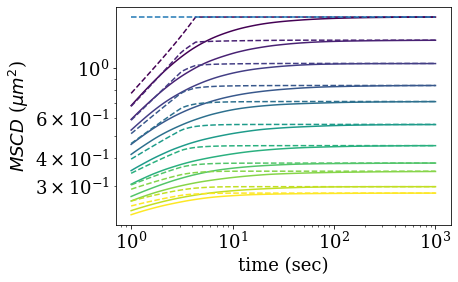

In [12]:
mus = np.linspace(0,10,11)
num_cells=1000
t = np.logspace(0,3,100).astype(float)

for i_mu in range(len(mus)):
    mu = mus[i_mu]
    mscd = np.zeros_like(t).astype(float)
    mscd_exp_d = np.zeros_like(t).astype(float)
    for i_cell in range(num_cells):
        linkages = poly_dyn.generate_example_cell(mu, total_length_um)
        d_cell = d0 * np.random.exponential()
        mscd += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d0, num_modes=10000)
        mscd_exp_d += 1 / num_cells * poly_dyn.model_mscd(
            t, linkages, label_loc_um, 
            total_length_um,
            nuc_radius, kuhn_length, d_cell, num_modes=10000)

    color_ratio = i_mu / (len(mus)-1)
    plt.loglog(t, mscd, '--', c=viridis(color_ratio))
    plt.loglog(t, mscd_exp_d, '-', c=viridis(color_ratio))

plt.loglog(t, 0*t + nuc_radius ** 2, '--')
    
#cb = plt.colorbar()
#cb.set_label('Average linkages per chromosome')
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xlabel(r'time (sec)')
plt.ylabel(r'$MSCD$ ($\mu m^{2}$)')
plt.show()

In [13]:
kuhn_length

0.106

Evaluation of the MSCD plateau versus the number of linkages (URA3, chr. V, $b = 0.015 \mu m$)

In [14]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

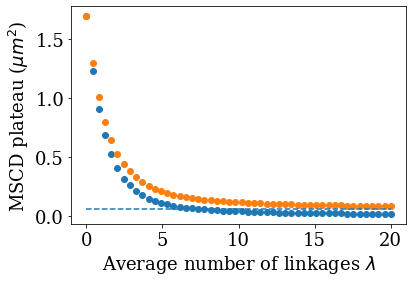

In [15]:
mus = np.linspace(0, 20, 50)
N_cells_vector = np.logspace(5,5,1).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus = np.zeros_like(mus)
    theory_plateaus_biased = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell = poly_dyn.model_plateau(
                cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
            theory_plateaus[i] += (1 / N_cells) * mscd_plateau_cell
            if mscd_plateau_cell > radius_sq_cutoff:
                N_cells_biased += 1
                theory_plateaus_biased[i] += mscd_plateau_cell
        theory_plateaus_biased[i] /= N_cells_biased
    plt.scatter(mus, theory_plateaus)
    plt.scatter(mus, theory_plateaus_biased)

plt.plot(mus,0*mus + radius_sq_cutoff, '--')

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

In [16]:
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])
mufit_ura = np.interp(plateau_exp_ura, np.flipud(theory_plateaus_biased), np.flipud(mus))
mufit_spo = np.interp(plateau_exp_spo, np.flipud(theory_plateaus_biased), np.flipud(mus))

In [17]:
mufit_ura

array([0.76365511, 0.45310417, 0.25686519, 0.21482827, 0.347307  ,
       0.68385285])

In [52]:
total_length_um

17.162001500000002

Evaluation of the MSCD plateau versus the number of linkages (URA3, chr. V, $b = 0.106 \mu m$)

In [87]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.20  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

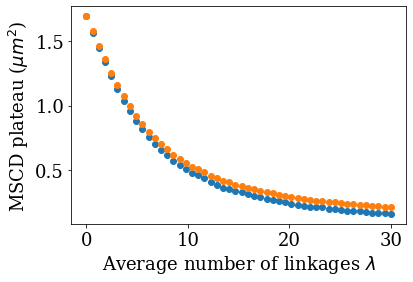

In [88]:
mus = np.linspace(0, 30, 50)
N_cells_vector = np.logspace(4,4,1).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus = np.zeros_like(mus)
    theory_plateaus_biased = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell = poly_dyn.model_plateau(
                cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
            theory_plateaus[i] += (1 / N_cells) * mscd_plateau_cell
            if mscd_plateau_cell > radius_sq_cutoff:
                N_cells_biased += 1
                theory_plateaus_biased[i] += mscd_plateau_cell
        theory_plateaus_biased[i] /= N_cells_biased
    plt.scatter(mus, theory_plateaus)
    plt.scatter(mus, theory_plateaus_biased)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

In [89]:
plateau_exp_ura = np.array([1.041056, 1.260354, 1.439587, 1.480568, 1.351417, 1.097409])
plateau_exp_spo = np.array([0.999832, 1.173121, 1.349847, 1.494605, 1.509391, 1.314366, 1.441702])
mufit_ura = np.interp(plateau_exp_ura, np.flipud(theory_plateaus_biased), np.flipud(mus))
mufit_spo = np.interp(plateau_exp_spo, np.flipud(theory_plateaus_biased), np.flipud(mus))

In [90]:
print(mufit_ura)
print(mufit_spo)

[3.90662391 2.40545467 1.34414636 1.11159065 1.8644027  3.48232184]
[4.23557043 2.95942374 1.87373088 1.03501145 0.95434607 2.08454169
 1.33167141]


Evaluation of the MSCD plateau versus the number of linkages (LYS2, chr. II, $b = 0.015 \mu m$)

In [19]:
chr_size_bp = 813184
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([469748, 473926])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um = locus_position_kuhn * kuhn_length
total_length_um = total_length_kuhn * kuhn_length

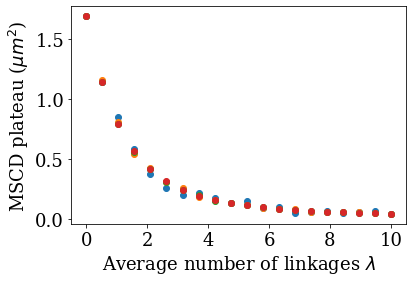

In [20]:
mus = np.linspace(0, 10, 20)
N_cells_vector = np.logspace(2,5,4).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus = np.zeros_like(mus)
    theory_plateaus_biased = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell = poly_dyn.model_plateau(
                cell, label_loc_um, total_length_um, nuc_radius, kuhn_length)
            theory_plateaus[i] += (1 / N_cells) * mscd_plateau_cell
            if mscd_plateau_cell > radius_sq_cutoff:
                N_cells_biased += 1
                theory_plateaus_biased[i] += mscd_plateau_cell
        theory_plateaus_biased[i] /= N_cells_biased
    plt.scatter(mus, theory_plateaus)
#    plt.scatter(mus, theory_plateaus_biased)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

Evaluation of the MSCD plateau versus the number of linkages (comparison between URA3 and LYS2, $b = 0.015 \mu m$)

In [21]:
chr_size_bp = 813184
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([469748, 473926])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um1 = locus_position_kuhn * kuhn_length
total_length_um1 = total_length_kuhn * kuhn_length

In [22]:
chr_size_bp = 576874
linker_length = 15
nucleo_length = 146
d0 = 3.487
locus_position_bp = np.mean([116167, 116970])
kuhn_length = 0.015  # Kuhn length in um
nuc_radius = 1.3

chr_size_linker_bp = linker_length * chr_size_bp / (linker_length + nucleo_length)
total_length_kuhn = chr_size_linker_bp * 0.34 * 0.001 / kuhn_length
locus_position_kuhn = total_length_kuhn * locus_position_bp / chr_size_bp
label_loc_um2 = locus_position_kuhn * kuhn_length
total_length_um2 = total_length_kuhn * kuhn_length

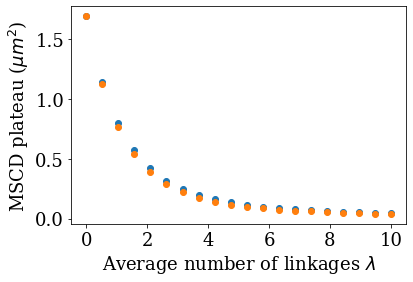

In [23]:
mus = np.linspace(0, 10, 20)
N_cells_vector = np.logspace(5,5,1).astype(int)
radius_sq_cutoff = 0.250 ** 2

plt.figure()
#ax.set_prop_cycle(color=['#aec7e8'])

for i_sample in range(len(N_cells_vector)):
    N_cells = N_cells_vector[i_sample]
    theory_plateaus1 = np.zeros_like(mus)
    theory_plateaus2 = np.zeros_like(mus)
    for i, mu in enumerate(mus):
        N_cells_biased = 0
        for j in range(N_cells):
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell1 = poly_dyn.model_plateau(
                cell, label_loc_um1, total_length_um1, nuc_radius, kuhn_length)
            theory_plateaus1[i] += (1 / N_cells) * mscd_plateau_cell1
            cell = poly_dyn.generate_example_cell(mu, total_length_um)
            mscd_plateau_cell2 = poly_dyn.model_plateau(
                cell, label_loc_um2, total_length_um2, nuc_radius, kuhn_length)
            theory_plateaus2[i] += (1 / N_cells) * mscd_plateau_cell2

    plt.scatter(mus, theory_plateaus1)
    plt.scatter(mus, theory_plateaus2)

plt.xlabel('Average number of linkages $\lambda$')
plt.ylabel('MSCD plateau ($\mu{}m^2$)') 

plt.show()

In [24]:
theory_plateaus2

array([1.69      , 1.12593798, 0.76400323, 0.54294595, 0.39036957,
       0.28734535, 0.22218168, 0.17324642, 0.13939366, 0.11761999,
       0.09919806, 0.08678086, 0.07552282, 0.06701468, 0.06029082,
       0.05458417, 0.04968303, 0.04543043, 0.04233424, 0.03943398])